In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
sys.path.append("../..")

In [4]:
import os
import json
import math
import numpy as np
import pandas as pd
from explorer.utils import load_states_from_dir
import matplotlib.pyplot as plt

/Users/patrickjohnchia/Desktop/Projects/negotiation/.venv/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [10]:
log_dir = "/Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/split_the_difference/"
game_states = load_states_from_dir(log_dir)


Exception Type: AssertionError
Exception Message: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/split_the_difference/1701759748110/game_state.json has not ended

Stack Trace:
Traceback (most recent call last):
  File "../../explorer/utils.py", line 111, in load_states_from_dir
    assert (
AssertionError: WARNING : Game  /Users/patrickjohnchia/Desktop/Projects/negotiation/.logs/split_the_difference/1701759748110/game_state.json has not ended


THERE ARE 71 log files
70 Loaded Successfully


In [11]:
game_states = [ g for g in game_states if len(g.game_state) >=5]
print(len(game_states))

64


In [12]:
# extract trade object
trade_proposals =[[ _['player_public_info_dict']['newly proposed trade'] for _ in  g.game_state[1:-1]] for g in game_states] 
# extract ZUP remove none
trade_proposals = [[ _.resources_from_second_agent.resource_dict['ZUP'] for _ in tp if _ != "NONE"] for tp in trade_proposals]
print(trade_proposals)
# keep sequences that are long enough
trade_proposals = [ tp for tp in trade_proposals if len(tp) >= 3]
# make triples
trade_proposals = [[[a,b,c] for a,b,c in zip(tp, tp[1:], tp[2:])] for tp in trade_proposals]
# flatten
trade_proposals = np.array([ _ for tp in trade_proposals for _ in tp])

[[50.0, 40.0, 45.0], [30.0, 27.0, 28.0], [50.0, 42.0, 46.0, 44.0, 45.0], [30.0, 50.0], [50.0, 60.0, 55.0, 58.0], [40.0, 30.0, 36.0, 34.0, 35.0], [50.0, 45.0, 48.0], [30.0, 25.0, 28.0, 27.0], [50.0, 45.0, 48.0, 47.0], [30.0, 25.0, 28.0], [50.0, 45.0, 48.0], [35.0, 30.0, 33.0], [30.0, 25.0, 28.0, 26.5, 27.0], [40.0, 50.0], [50.0, 60.0], [50.0, 40.0, 45.0, 42.0, 44.0, 43.0, 43.5, 44.0], [30.0, 20.0, 27.0, 23.0, 25.0], [35.0, 50.0], [50.0, 45.0, 47.0], [30.0, 28.0, 29.0], [50.0, 40.0, 45.0], [30.0, 28.0, 29.0], [40.0, 38.0, 39.0], [50.0, 45.0, 48.0, 47.0], [50.0, 45.0, 48.0, 46.0, 47.0], [40.0, 55.0], [50.0, 45.0, 48.0], [50.0, 40.0, 45.0, 42.0, 43.5, 43.0], [40.0, 35.0, 38.0, 36.0, 37.0], [50.0, 60.0, 55.0], [50.0, 40.0, 45.0, 44.0], [35.0, 30.0, 32.0], [35.0, 30.0, 32.0], [40.0, 35.0, 37.0], [40.0, 50.0], [50.0, 40.0, 45.0, 43.0], [50.0, 65.0], [30.0, 50.0], [30.0, 25.0, 28.0, 27.0], [50.0, 40.0, 45.0, 42.0], [30.0, 25.0, 27.0], [50.0, 40.0, 45.0, 42.0, 44.0], [35.0, 30.0, 32.0, 31.0], [

In [13]:
# (Trade @ t-1) - (Trade @ t-2)
proposal_average = (trade_proposals[:, 1] + trade_proposals[:, 0])/2
new_proposal =  trade_proposals[:, 2]

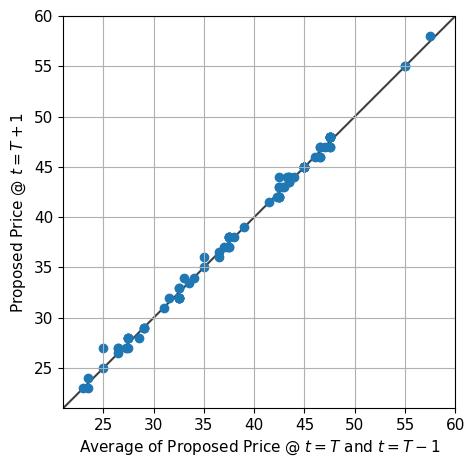

In [14]:
# https://stackoverflow.com/questions/25497402/adding-y-x-to-a-matplotlib-scatter-plot-if-i-havent-kept-track-of-all-the-data
plt.rcParams.update({'font.size': 11})
fig,ax = plt.subplots()
ax.scatter(proposal_average, new_proposal)
lims = [
    math.floor(np.min([ax.get_xlim(), ax.get_ylim()])),  # min of both axes
    math.ceil(np.max([ax.get_xlim(), ax.get_ylim()])),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
# ax.set_title('TEST')

ax.set_ylabel('Proposed Price @ $t = T+1$')
ax.set_xlabel('Average of Proposed Price @ $t = T$ and $t = T-1$')
ax.grid()

plt.tight_layout()
# plt.savefig('split_the_diff_plot_1.pdf')  